In [1]:
!pip install transformers==4.40.1 datasets==2.19.0 huggingface_hub==0.23.0 -qqq

In [2]:
from transformers import AutoTokenizer, AutoModel

text = "What is Huggingface Transformers?"
# BERT 모델 활용
bert_model = AutoModel.from_pretrained("bert-base-uncased")
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
encoded_input = bert_tokenizer(text, return_tensors='pt')
bert_output = bert_model(**encoded_input)
# GPT-2 모델 활용
gpt_model = AutoModel.from_pretrained('gpt2')
gpt_tokenizer = AutoTokenizer.from_pretrained('gpt2')
encoded_input = gpt_tokenizer(text, return_tensors='pt')
gpt_output = gpt_model(**encoded_input)

/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resu

In [3]:
from transformers import AutoModel
model_id = 'klue/roberta-base'
model = AutoModel.from_pretrained(model_id)

Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
from transformers import AutoModelForSequenceClassification
model_id = 'SamLowe/roberta-base-go_emotions'
classification_model = AutoModelForSequenceClassification.from_pretrained(model_id)

In [5]:
#분류 헤드가 랜덤으로 초기화된 모델 불러오기
from transformers import AutoModelForSequenceClassification
model_id = 'klue/roberta-base'
classification_model = AutoModelForSequenceClassification.from_pretrained(model_id)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
#토크나이저 불러오기
from transformers import AutoTokenizer
model_id = 'klue/roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [7]:
#토크나이저 사용하기
tokenized = tokenizer("토크나이저는 텍스트를 토큰 단위로 나눈다")
print(tokenized)
# {'input_ids': [0, 9157, 7461, 2190, 2259, 8509, 2138, 1793, 2855, 5385, 2200, 20950, 2],
#  'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

print(tokenizer.convert_ids_to_tokens(tokenized['input_ids']))
# ['[CLS]', '토크', '##나이', '##저', '##는', '텍스트', '##를', '토', '##큰', '단위', '##로', '나눈다', '[SEP]']

print(tokenizer.decode(tokenized['input_ids']))
# [CLS] 토크나이저는 텍스트를 토큰 단위로 나눈다 [SEP]

print(tokenizer.decode(tokenized['input_ids'], skip_special_tokens=True))
# 토크나이저는 텍스트를 토큰 단위로 나눈다

{'input_ids': [0, 9157, 7461, 2190, 2259, 8509, 2138, 1793, 2855, 5385, 2200, 20950, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', '토크', '##나이', '##저', '##는', '텍스트', '##를', '토', '##큰', '단위', '##로', '나눈다', '[SEP]']
[CLS] 토크나이저는 텍스트를 토큰 단위로 나눈다 [SEP]
토크나이저는 텍스트를 토큰 단위로 나눈다


In [8]:
tokenizer(['첫 번째 문장', '두 번째 문장'])

# {'input_ids': [[0, 1656, 1141, 3135, 6265, 2], [0, 864, 1141, 3135, 6265, 2]],
# 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]],
# 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

{'input_ids': [[0, 1656, 1141, 3135, 6265, 2], [0, 864, 1141, 3135, 6265, 2]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [10]:
#하나의 데이터에 여러 문장이 들어가는 경우
tokenizer([['첫 번째 문장', '두 번째 문장']])

# {'input_ids': [[0, 1656, 1141, 3135, 6265, 2, 864, 1141, 3135, 6265, 2]],
# 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
# 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

{'input_ids': [[0, 1656, 1141, 3135, 6265, 2, 864, 1141, 3135, 6265, 2]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [11]:
#토큰 아이디를 문자열로 복원
first_tokenized_result = tokenizer(['첫 번째 문장', '두 번째 문장'])['input_ids']
tokenizer.batch_decode(first_tokenized_result)
# ['[CLS] 첫 번째 문장 [SEP]', '[CLS] 두 번째 문장 [SEP]']

second_tokenized_result = tokenizer([['첫 번째 문장', '두 번째 문장']])['input_ids']
tokenizer.batch_decode(second_tokenized_result)
# ['[CLS] 첫 번째 문장 [SEP] 두 번째 문장 [SEP]']

['[CLS] 첫 번째 문장 [SEP] 두 번째 문장 [SEP]']

In [12]:
#bert와 roberta
bert_tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')
bert_tokenizer([['첫 번째 문장', '두 번째 문장']])
# {'input_ids': [[2, 1656, 1141, 3135, 6265, 3, 864, 1141, 3135, 6265, 3]],
# 'token_type_ids': [[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]],
# 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

roberta_tokenizer = AutoTokenizer.from_pretrained('klue/roberta-base')
roberta_tokenizer([['첫 번째 문장', '두 번째 문장']])
# {'input_ids': [[0, 1656, 1141, 3135, 6265, 2, 864, 1141, 3135, 6265, 2]],
# 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
# 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

en_roberta_tokenizer = AutoTokenizer.from_pretrained('roberta-base')
en_roberta_tokenizer([['first sentence', 'second sentence']])
# {'input_ids': [[0, 9502, 3645, 2, 2, 10815, 3645, 2]],
# 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1]]}

/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'input_ids': [[0, 9502, 3645, 2, 2, 10815, 3645, 2]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1]]}

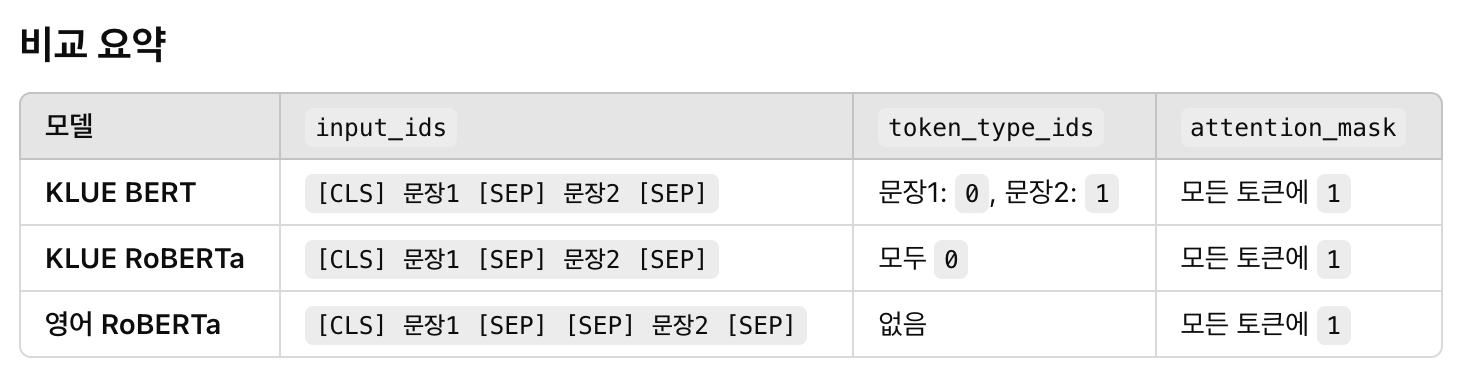

In [13]:
tokenizer(['첫 번째 문장은 짧다.', '두 번째 문장은 첫 번째 문장 보다 더 길다.'], padding='longest')

# {'input_ids': [[0, 1656, 1141, 3135, 6265, 2073, 1599, 2062, 18, 2, 1, 1, 1, 1, 1, 1],
# [0, 864, 1141, 3135, 6265, 2073, 1656, 1141, 3135, 6265, 3632, 831, 647, 2062, 18, 2]],
# 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

#padding='longest == 입력 문장 중 가장 긴 문장 길이에 맞추어 나머지 문장에 패딩 0

{'input_ids': [[0, 1656, 1141, 3135, 6265, 2073, 1599, 2062, 18, 2, 1, 1, 1, 1, 1, 1], [0, 864, 1141, 3135, 6265, 2073, 1656, 1141, 3135, 6265, 3632, 831, 647, 2062, 18, 2]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [20]:
pip install --upgrade datasets


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [23]:
from datasets import load_dataset
# 로컬의 데이터 파일을 활용
dataset = load_dataset("csv", data_files="my_file.csv")

# 파이썬 딕셔너리 활용
from datasets import Dataset
my_dict = {"a": [1, 2, 3]}
dataset = Dataset.from_dict(my_dict)

# 판다스 데이터프레임 활용
from datasets import Dataset
import pandas as pd
df = pd.DataFrame({"a": [1, 2, 3]})
dataset = Dataset.from_pandas(df)

FileNotFoundError: Unable to find '/Users/kimeunsur/Documents/GitHub/BBManager/nlp/my_file.csv'